# Data Source

- The data is collected from the source https://github.com/CSSEGISandData/COVID-19
- This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the 
`Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)`.
 Also, Supported by `ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL)`.
 
- You can view their dashboard at
 https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

In [111]:
import pandas as pd
from IPython.display import Image
import os
ROOT_DIR = "D:/Machine Learning/Machine Learning/COVID-19"

In [62]:
conf_case = pd.read_csv(os.path.join(ROOT_DIR, 'time_series_covid19_confirmed_global.csv'))
conf_death = pd.read_csv(os.path.join(ROOT_DIR, 'time_series_covid19_deaths_global.csv'))
conf_recovered = pd.read_csv(os.path.join(ROOT_DIR, 'time_series_covid19_recovered_global.csv'))

In [63]:
cdf_conf_case = conf_case[conf_case['Country/Region']=='India'].sum().drop(['Province/State','Country/Region','Lat','Long'])
cdf_conf_death = conf_death[conf_death['Country/Region']=='India'].sum().drop(['Province/State','Country/Region','Lat','Long'])
cdf_conf_recovered = conf_recovered[conf_recovered['Country/Region']=='India'].sum().drop(['Province/State','Country/Region','Lat','Long'])

In [207]:
def perDayCalc(totalList):
    pdf = []
    for idx, num in enumerate(totalList):
        if idx == 0:
            pdf.append(num)
            prev = num
        else:
            pdf.append(num - prev)
            prev = num
    return pdf

def rateOfChange(totalList, interval=5):
    changeVal = []
    changePer = []
    for idx, num in enumerate(totalList):
        if idx < interval:
            changeVal.append(sum(totalList[:(idx+1)])/(idx+1))
        else:
            changeVal.append(sum(totalList[idx-interval+1:(idx+1)])/interval)
    for idx, newVal in enumerate(changeVal):
        if idx == 0:
            changePer.append(0)
            prevVal = newVal
        elif prevVal!=0:
            changePer.append(100*(newVal-prevVal)/prevVal)
            prevVal = newVal
        else:
            changePer.append(1)
            prevVal = newVal
    changePer = [i%35 for i in changePer]
    return changePer #changeVal

def doublingRate(changePer):
    return [np.log(2)/np.log(1+(per/100)) for per in changePer]

In [68]:
cdf_case_list = cdf_conf_case.to_frame().T.sum().tolist()
cdf_death_list = cdf_conf_death.to_frame().T.sum().tolist()
cdf_recovered_list = cdf_conf_recovered.to_frame().T.sum().tolist()
cdf_active_list = np.subtract(np.subtract(cdf_case_list, cdf_recovered_list).tolist(), cdf_death_list).tolist()

pdf_case_list = perDayCalc(cdf_case_list)
pdf_death_list = perDayCalc(cdf_death_list)
pdf_recovered_list = perDayCalc(cdf_recovered_list)
pdf_active_list = perDayCalc(cdf_active_list)

### Cummulative visualization of COVID-19 cases in India since inception

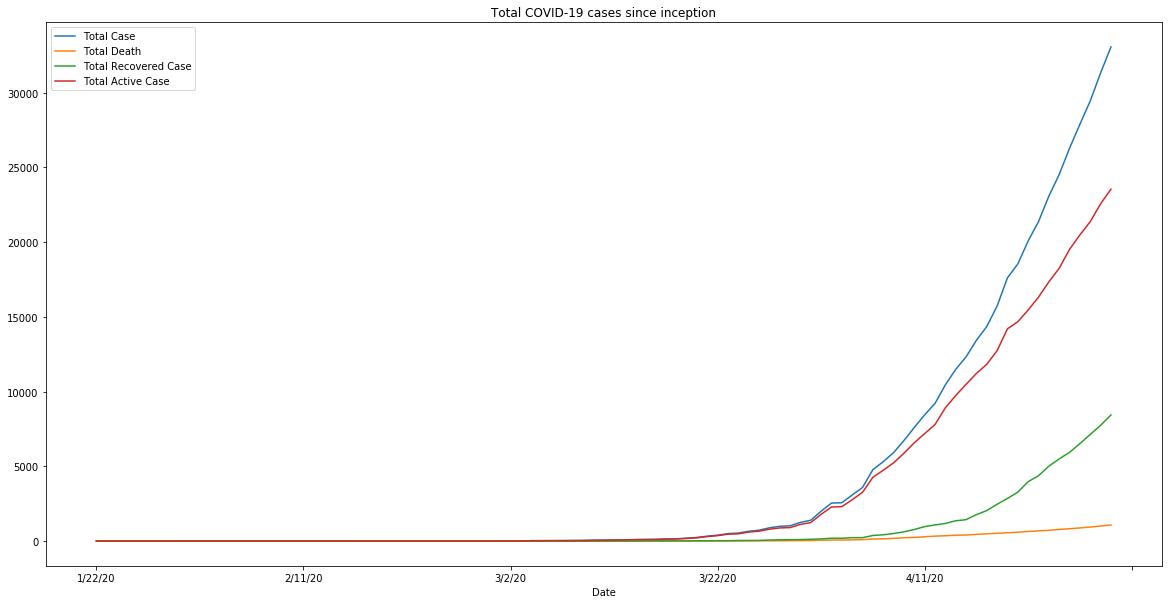

In [213]:
data = {"Date": cdf_conf_case.to_frame().T.columns.to_list(),
        "Total Case": cdf_case_list, 
        "Total Death": cdf_death_list, 
        "Total Recovered Case": cdf_recovered_list, 
        "Total Active Case": cdf_active_list}
df = pd.DataFrame(data).set_index("Date")
df.plot(figsize=(20, 10), title ="Total COVID-19 cases since inception", fontsize = 10, kind="line")

### Daily basis newly added case visualization along with active cases

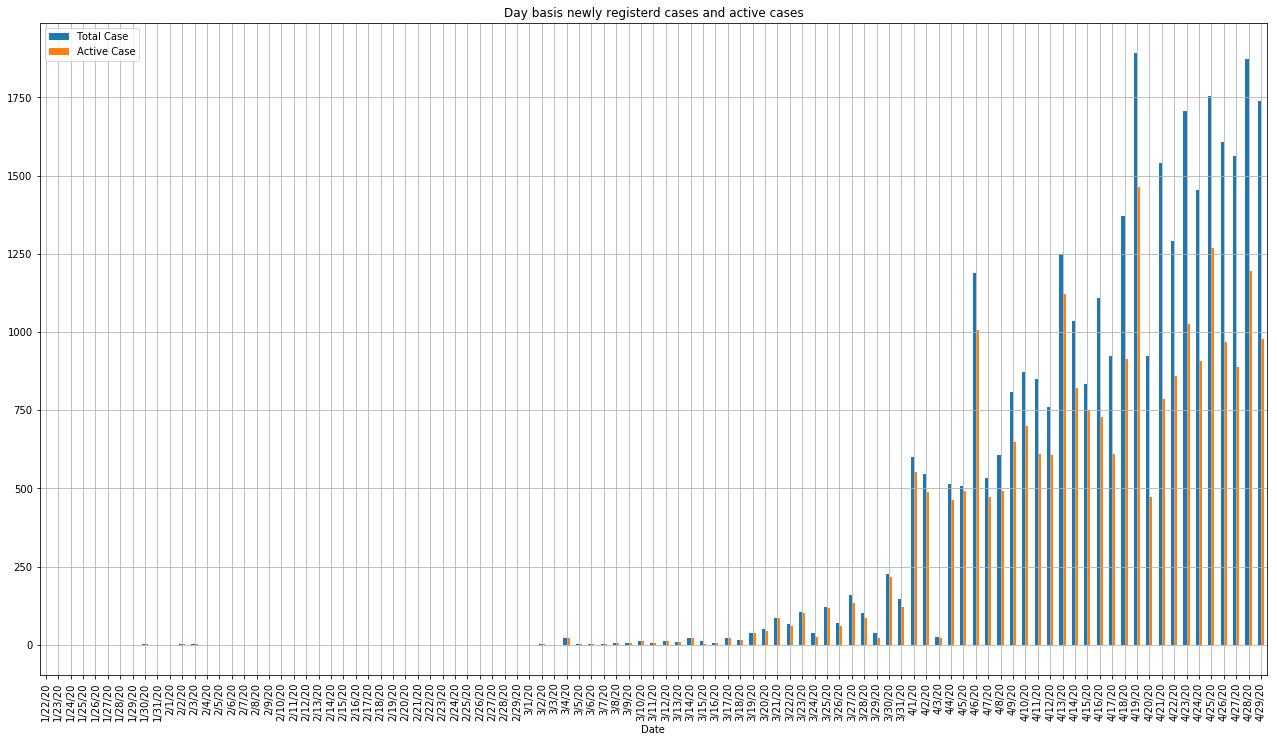

In [218]:
data = {"Date": cdf_conf_case.to_frame().T.columns.to_list(),
        "Total Case": pdf_case_list, 
        "Total Death": pdf_death_list, 
        "Recovered Case": pdf_recovered_list, 
        "Active Case": pdf_active_list}
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])
data = dictfilt(data, ("Total Case", 'Active Case', 'Date'))
df = pd.DataFrame(data).set_index("Date")
df.plot(figsize=(22, 12), title ="Day basis newly registerd cases and active cases", fontsize = 10, 
        kind="bar", grid = True)

# Rate of Increase of COVID-19 cases

### Percentagewise increment of daily new cases as compared to previous day

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars


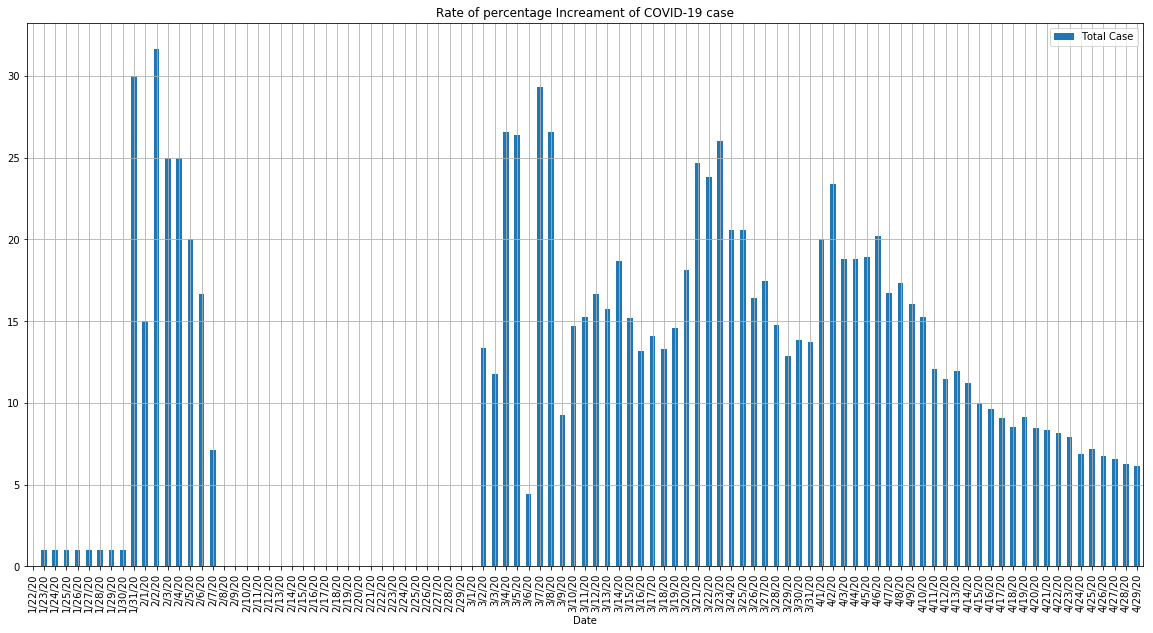

In [201]:
data = {"Date": cdf_conf_case.to_frame().T.columns.to_list(),
        "Total Case": rateOfChange(cdf_case_list), 
        "Total Death": rateOfChange(cdf_death_list), 
        "Recovered Case": rateOfChange(cdf_recovered_list), 
        "Active Case": rateOfChange(cdf_active_list),
        "Doubling rate of Total Case": doublingRate(rateOfChange(cdf_case_list))
       }
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])
data = dictfilt(data, ("Total Case", 'Date'))
df = pd.DataFrame(data).set_index("Date")
df.plot(figsize=(20, 10), title ="Rate of percentage Increament of COVID-19 case", fontsize = 10, kind="bar", grid = True)

### Doubling rate of the cases in last 5 days

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars


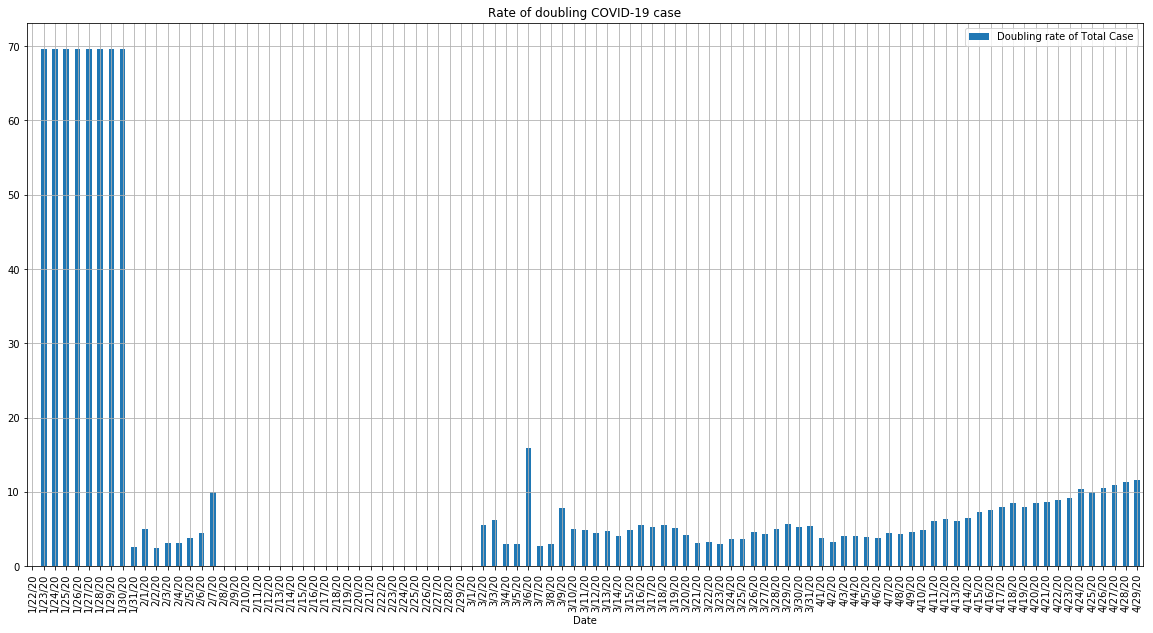

In [210]:
data = {"Date": cdf_conf_case.to_frame().T.columns.to_list(),
        "Total Case": rateOfChange(cdf_case_list), 
        "Total Death": rateOfChange(cdf_death_list), 
        "Recovered Case": rateOfChange(cdf_recovered_list), 
        "Active Case": rateOfChange(cdf_active_list),
        "Doubling rate of Total Case": doublingRate(rateOfChange(cdf_case_list))
       }
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])
data = dictfilt(data, ("Doubling rate of Total Case", 'Date'))
df = pd.DataFrame(data).set_index("Date")
df.plot(figsize=(20, 10), title ="Rate of doubling COVID-19 case", fontsize = 10, kind="bar", grid = True)

# Finding R-naught value in India for COVID19

The `R-Naught` of a disease, or the `contagiousness`, represents how transmissible the disease is. An R-Naught of 2 means that for every one person with the disease, two more people are infected. A fractional R-Naught means that the epidemic is dying down. Hepatitis C and Ebola have an R-Naught of 2, HIV and SARS 4, and Measles 18, to give a few examples.


The `R-Naught (R0)` of a disease is usually publicly declared by the World Health Organization after careful and lengthy analysis of various factor such as the infectious period, contact rate, mode of transmission, etc.
In this article, we’ll handwrite a program that optimizes an exponential model to the data to find the R0 of the coronavirus in Python. While this is in no means a substitute for the WHO and other health agencies’ findings, it is a good way to gauge just how contagious the coronavirus is with the current lack of information.


In this notebook, we’ll handwrite a program that optimizes an exponential model to the data to find the R0 of the coronavirus in Python. While this is in no means a substitute for the WHO and other health agencies’ findings, it is a good way to gauge just how contagious the coronavirus is with the current lack of information.

# R-naught Model

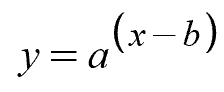

In [179]:
Image(filename='a.png')

Our model will have a very simple equation stated above:

…where y is the forecasted number of cases and x is the number of days since the first confirmed case. a and b are the only two parameters that will allow changing.

a controls how steep the curve will be. A smaller a value represents a less steep curve, and a higher a value represents a steeper curve.

a is also the R0 value. For each number of days x after the epidemic begins, the number of new cases multiplies by a factor of a — for every one person infected on day x, a more people will be infected on day x + 1.
This also provides another representation of what different quantities of R0 values mean.

# Fitting the Model
To fit the model, we will implement a very simple yet effective gradient descent algorithm. 

The process is:

1. Initialize a and b to 1 and 30, respectively.
2. Initialize lr1 and lr2 to 0.00005 each. (lr1 and lr2 are the learning rates for a and b, respectively. More on this soon.)
3. Take the current value of b and create two new variables for consideration, b + lr1 and b - lr2. These two will be named b1 and b2.
4. Evaluate the mean absolute error between the model using b1 against the real data.
5. Evaluate the mean absolute error between the model using b2 against the real data.
6. Whichever variant of b has a lower mean absolute error becomes the new b.
7. Repeat steps 3 through 6 for a. Since a is a more important metric than b, a is second (its value is updated last, meaning it has the 'final say').
8. Repeat steps 3 through 7 ten thousand times.


Summarizing the steps, this approach towards adjusting a and b takes linear steps in the right direction. It has no momentum (imagine a ball rolling down the error space - as it rolls down, it speeds up), meaning that as soon as it reaches a local minima, it stays there. While this would be a problem for neural networks that have hundreds of thousands of parameters, it works fine for only two variables: using advanced optimizers is definitely overkill in this scenario.
Let’s get started implementing the algorithm.

In [112]:
y = conf_case[conf_case['Country/Region']=='India'].sum().drop(['Province/State','Country/Region','Lat','Long']).tolist()
x = range(len(y))

#Obtain estimate
import ast
def get_error(a,b):
    error = 0
    for index in x:
        error += abs((a**(x[index]-b)) - (y[index]))
    return error / len(x)

In [222]:
a = 1.2
lr1 = 0.0001
b = 5
lr2 = 0.0001

iterations = 10_0000

global_mem = []

for iteration in range(iterations):

    b1 = b + lr2
    b2 = b - lr2
    if get_error(a,b1) < get_error(a,b2):
        b = b1
    else:
        b = b2

    a1 = a + lr1
    a2 = a - lr1
    if get_error(a1,b) < get_error(a2,b):
        a = a1
    else:
        a = a2

    global_mem.append(get_error(a,b))
    
    if iteration % 1_0000 == 0:
        print('ITERATION {}'.format(iteration))
        print("{'A':"+str(a)+", 'B':"+str(b)+"}")
        print('Error:',global_mem[-1],'\n')

ITERATION 0
{'A':1.1999, 'B':5.0001}
Error: 1386252.4124757193 

ITERATION 10000
{'A':1.1217000000000086, 'B':5.0572999999998665}
Error: 854.3687671353707 

ITERATION 20000
{'A':1.1217000000000086, 'B':5.0572999999998665}
Error: 854.3687671353707 

ITERATION 30000
{'A':1.1217000000000086, 'B':5.0572999999998665}
Error: 854.3687671353707 

ITERATION 40000
{'A':1.1217000000000086, 'B':5.0572999999998665}
Error: 854.3687671353707 

ITERATION 50000
{'A':1.1217000000000086, 'B':5.0572999999998665}
Error: 854.3687671353707 

ITERATION 60000
{'A':1.1217000000000086, 'B':5.0572999999998665}
Error: 854.3687671353707 

ITERATION 70000
{'A':1.1217000000000086, 'B':5.0572999999998665}
Error: 854.3687671353707 

ITERATION 80000
{'A':1.1217000000000086, 'B':5.0572999999998665}
Error: 854.3687671353707 

ITERATION 90000
{'A':1.1217000000000086, 'B':5.0572999999998665}
Error: 854.3687671353707 



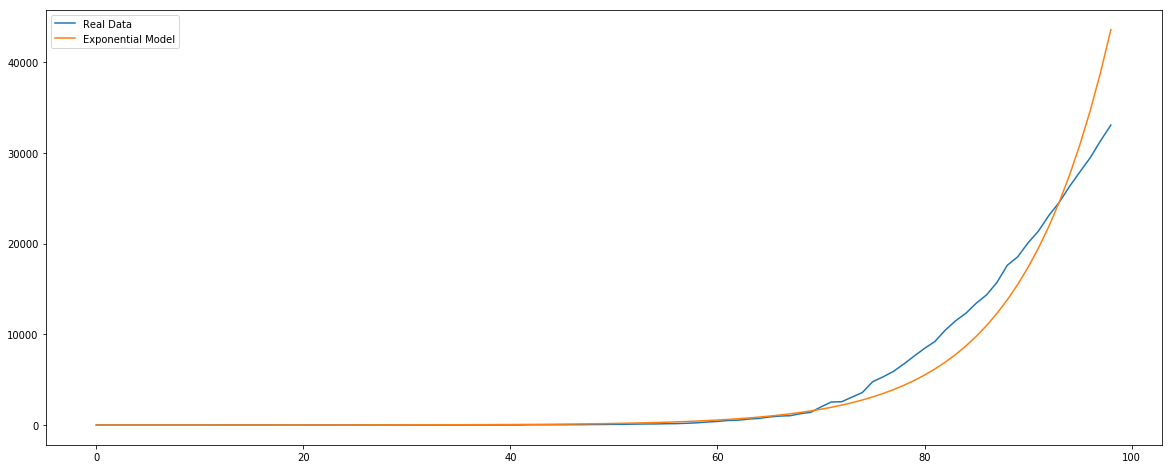

In [223]:
best_set = {'A':a, 'B':b}
def function(x):
    return best_set['A']**(x-best_set['B'])

plt.figure(figsize=(20,8))
plt.plot(x,y,label='Real Data')
plt.plot(x,[function(i) for i in x],label='Exponential Model')
plt.legend()

### Plotting out global_mem:

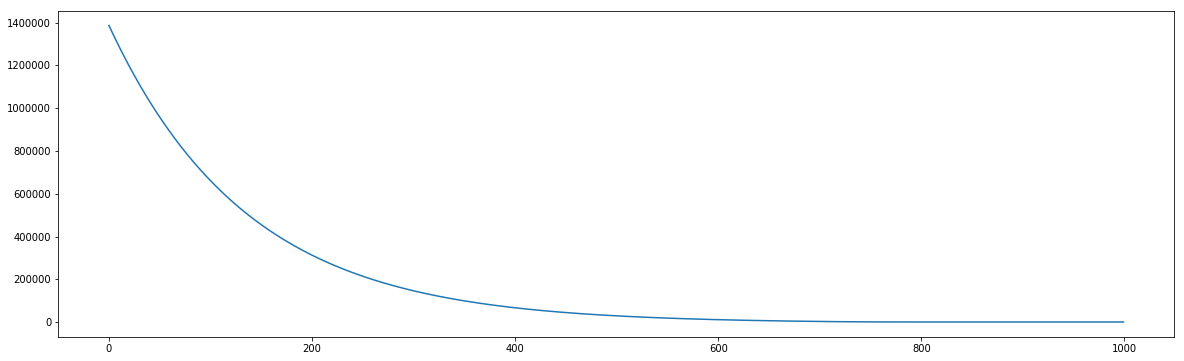

In [225]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(global_mem[:1000])

The model slowly makes progress and then begins plummeting exponentially until it reaches a convergence of about 854 at around the 400 iteration. It's incredible that a completely linear model - that is, simply choosing whether to go up or go down by a fixed amount - can have such a curved path towards convergence!

# Results

The last iteration has the following parameters.

```
ITERATION 90000
{'A':1.1217000000000086, 'B':5.0572999999998665}
Error: 854.3687671353707
```

This puts the R0 value at around 1.121 in India. This means that if you are living in India, tomorrow, 1.121 people will infected for every currently infected person today.